In [14]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')


In [2]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base= automap_base()
Base.prepare(autoload_with=engine)

# reflect the tables

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [39]:
# printing so we can see the columns

first_row = session.query(measurement).first()
first_row2 = session.query(station).first()
first_row.__dict__
#first_row2.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x22f37cf31f0>,
 'prcp': 0.08,
 'id': 1,
 'tobs': 65.0,
 'station': 'USC00519397',
 'date': '2010-01-01'}

In [10]:
# Find the most recent date in the data set.
latest_date =session.query(func.max(measurement.date)).scalar()
print(latest_date)

2017-08-23


In [21]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
latest_date = datetime(2017,8,23)

# Calculate the date one year from the latest date
year_ago = latest_date - timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
last12 = session.query(measurement.date,measurement.prcp).\
     filter((measurement.date<=latest_date) & (measurement.date>year_ago))

# Save the query results as a Pandas DataFrame. Explicitly set the column names
data = pd.DataFrame(last12, columns=['date', 'prcp'])

# Sort the dataframe by date
data = data.sort_values(by='date', ascending=False)
data.head()

,date,prcp
2222,2017-08-23,0.45
1523,2017-08-23,0.08
1005,2017-08-23,0.00
359,2017-08-23,0.00
1522,2017-08-22,0.00


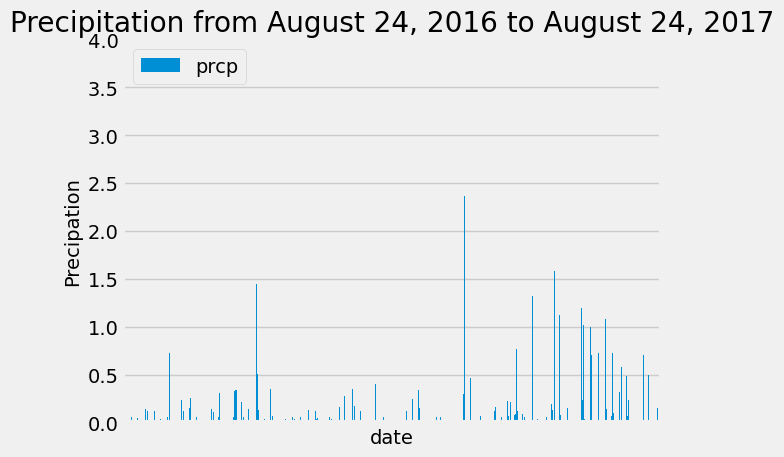

In [52]:
# Use Pandas Plotting with Matplotlib to plot the data
# Save the query results as a Pandas DataFrame. Explicitly set the column names
data = pd.DataFrame(last12, columns=['date', 'prcp'])
data.plot(kind="bar", x="date", y="prcp")
plt.xticks([])
plt.ylim(0, 4) 
plt.legend()
plt.ylabel("Precipation")
plt.title("Precipitation from August 24, 2016 to August 24, 2017")
plt.tight_layout()
plt.show()

In [16]:
# Use Pandas to calculate the summary statistics for the precipitation data
data['prcp'].describe()

count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64

# Exploratory Station Analysis

In [59]:
# Design a query to calculate the total number of stations in the dataset
numstations = session.query(station).\
     filter(station.id).count()
print(numstations)

9


In [57]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
activity = session.query(measurement.station, func.count(measurement.station)).\
    group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).all()
print(activity)

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [41]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
activeid = "USC00519281"
mostactive = session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).\
    filter(measurement.station==activeid).all()
print(mostactive)

[(54.0, 85.0, 71.66378066378067)]


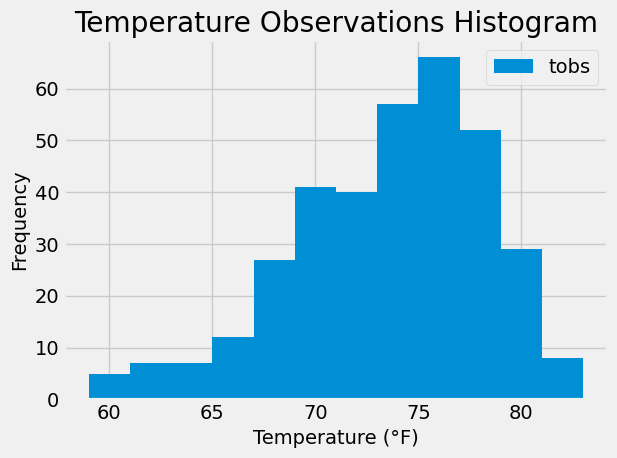

In [60]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp = session.query(measurement.date,measurement.tobs).\
    filter((measurement.date<=latest_date) & (measurement.date>year_ago)).\
    filter(measurement.station==activeid).all()

data2 = pd.DataFrame(temp, columns=['date', 'tobs'])

data2.plot(kind="hist", y="tobs", bins=12)

plt.title("Temperature Observations Histogram")
plt.xlabel("Temperature (°F)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# Close Session

In [16]:
# Close Session
session.close()